<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [9]:
import pandas as pd



Load the dataset into a dataframe.


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:


In [10]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [11]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

To obtain the dataset, utilize the download() function as defined above:  


In [12]:
await download(file_path, "m2_survey_data.csv")
file_name="m2_survey_data.csv"

Utilize the Pandas method read_csv() to load the data into a dataframe.


In [13]:
df = pd.read_csv(file_name)

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [14]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


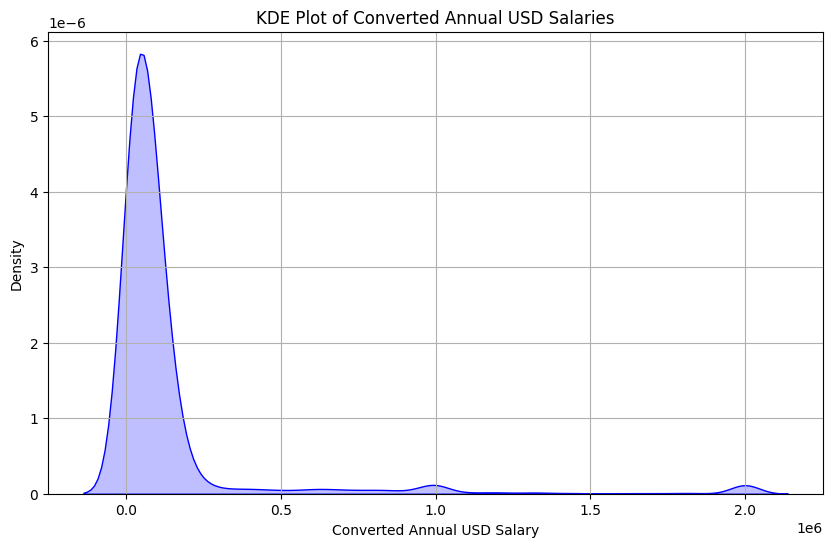

In [45]:
# your code goes here
%pip install seaborn


# Import the necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Check if the 'ConvertedComp' column exists in the dataframe
if 'ConvertedComp' in df.columns:
    # Drop any missing values from the 'ConvertedComp' column
    converted_comp_clean = df['ConvertedComp'].dropna()
    
    # Plot the KDE for the 'ConvertedComp' column
    plt.figure(figsize=(10, 6))
    sns.kdeplot(converted_comp_clean, fill=True, color='blue')

    plt.title('KDE Plot of Converted Annual USD Salaries')
    plt.xlabel('Converted Annual USD Salary')
    plt.ylabel('Density')
    plt.grid(True)
    plt.show()
else:
    print("The 'ConvertedComp' column does not exist in the dataframe.")


Plot the histogram for the column `ConvertedComp`.


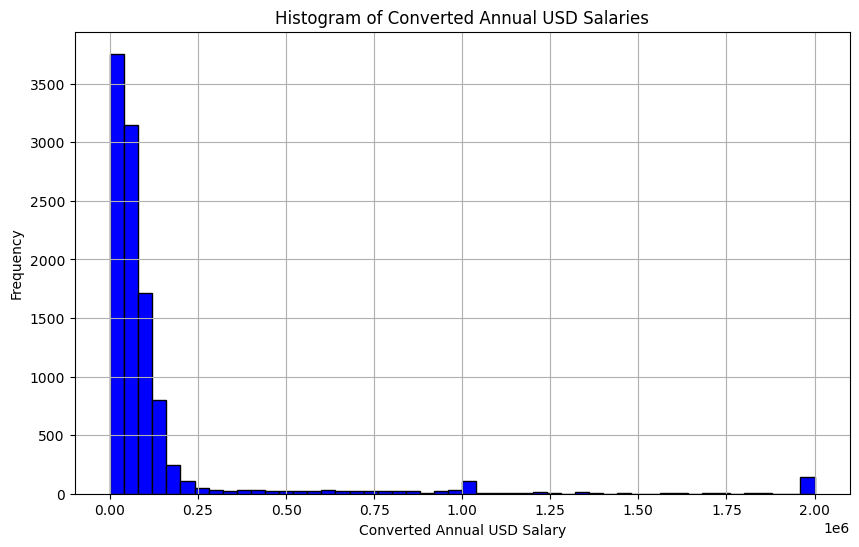

In [46]:
# your code goes here
import matplotlib.pyplot as plt
# Check if the 'ConvertedComp' column exists in the dataframe
if 'ConvertedComp' in df.columns:
    # Plot the histogram for the 'ConvertedComp' column
    plt.figure(figsize=(10, 6))
    plt.hist(df['ConvertedComp'].dropna(), bins=50, edgecolor='black', color='blue')
    plt.title('Histogram of Converted Annual USD Salaries')
    plt.xlabel('Converted Annual USD Salary')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()
else:
    print("The 'ConvertedComp' column does not exist in the dataframe.")


What is the median of the column `ConvertedComp`?


In [32]:
# your code goes here
print(df['ConvertedComp'].median())

57745.0


In [91]:
# your code goes here
print(df['Age'].median())

29.0


How many responders identified themselves only as a **Man**?


In [54]:
# your code goes here

# Count the number of responders who identified only as 'Man'
man_count = df[df['Gender'] == 'Man'].shape[0]
print(f"Number of responders who identified only as a Man: {man_count}")


Number of responders who identified only as a Man: 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [59]:
# your code goes here

woman_median_convertedcomp= df[df['Gender'] == 'Woman']['ConvertedComp'].median()
print(f"Number of median ConvertedComp of responders identified themselves only as a Woman: {woman_median_convertedcomp}")





Number of median ConvertedComp of responders identified themselves only as a Woman: 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [60]:
# your code goes here
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


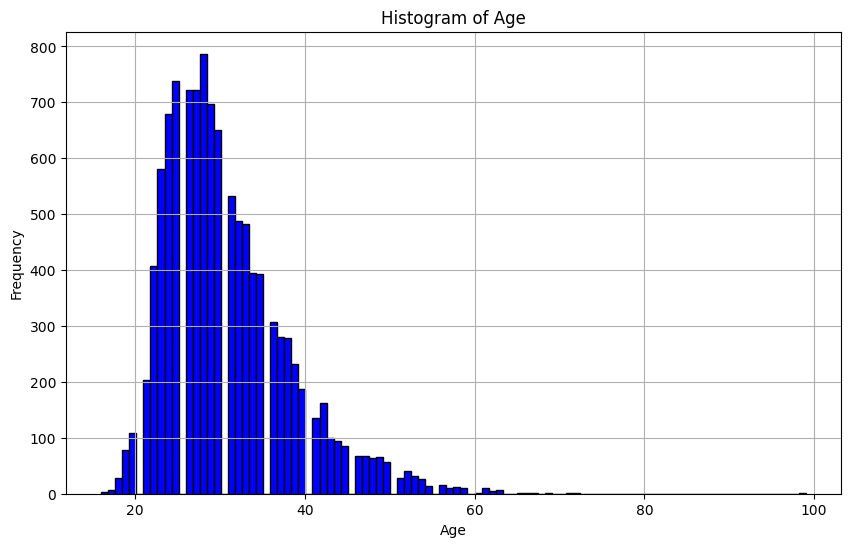

In [94]:
# your code goes here
plt.figure(figsize=(10, 6))
plt.hist(df['Age'].dropna(), bins=100, edgecolor='black', color='blue')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()




## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


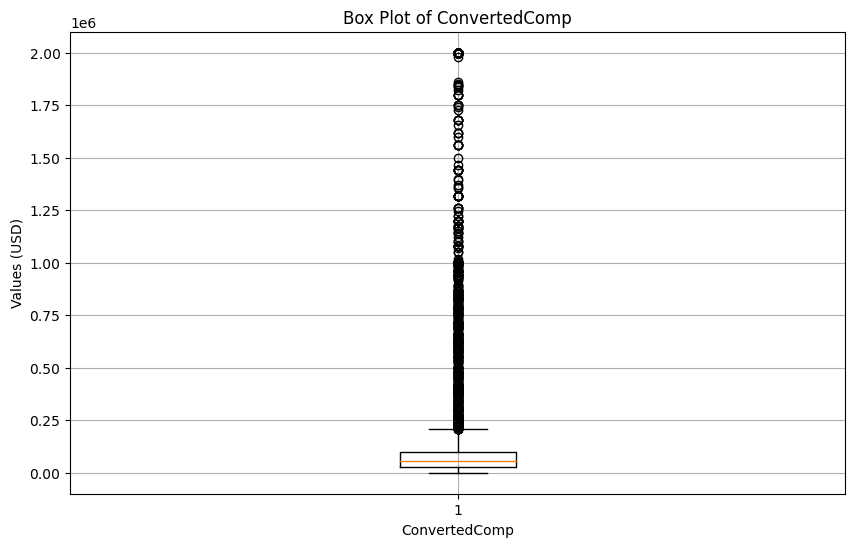

In [79]:
# your code goes here


plt.figure(figsize=(10, 6))  # Set the figure size
plt.boxplot(df['ConvertedComp'].dropna(), vert=True)  # Drop null values before plotting
plt.title('Box Plot of ConvertedComp')
plt.xlabel('ConvertedComp')
plt.ylabel('Values (USD)')
plt.grid(True)
plt.show()

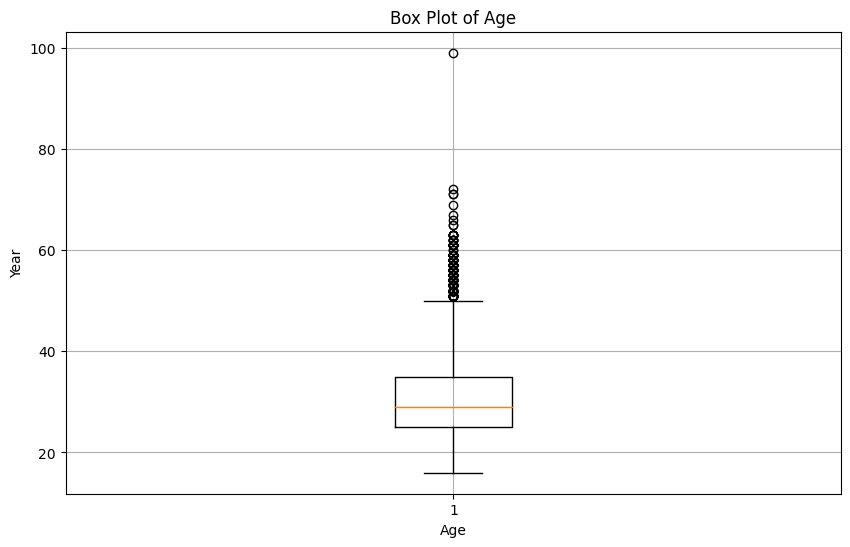

In [97]:
# your code goes here


plt.figure(figsize=(10, 6))  # Set the figure size
plt.boxplot(df['Age'].dropna(), vert=True)  # Drop null values before plotting
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.ylabel('Year')
plt.grid(True)
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [80]:
# your code goes here

# Drop any null values in the ConvertedComp column before calculating the IQR
# (Optional but recommended, as null values would affect the quartiles)
df_cleaned = df.dropna(subset=['ConvertedComp'])

# Calculate the quartiles
Q1 = df_cleaned['ConvertedComp'].quantile(0.25)
Q3 = df_cleaned['ConvertedComp'].quantile(0.75)

# Calculate the Inter Quartile Range
IQR = Q3 - Q1

print(f"The Inter Quartile Range (IQR) for the ConvertedComp column is: {IQR}")


The Inter Quartile Range (IQR) for the ConvertedComp column is: 73132.0


Find out the upper and lower bounds.


In [81]:
# your code goes here
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"The lower bound is: {lower_bound}")
print(f"The upper bound is: {upper_bound}")

The lower bound is: -82830.0
The upper bound is: 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [82]:
# your code goes here
outliers = df_cleaned[(df_cleaned['ConvertedComp'] < lower_bound) | (df_cleaned['ConvertedComp'] > upper_bound)]

# Print the number of outliers
print(f"There are {len(outliers)} outliers in the ConvertedComp column.")

There are 879 outliers in the ConvertedComp column.


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [87]:
# your code goes here
df_without_outliers = df_cleaned[(df_cleaned['ConvertedComp'] >= lower_bound) & (df_cleaned['ConvertedComp'] <= upper_bound)]

# Print the new DataFrame without outliers
print(df_without_outliers.head())

   Respondent                      MainBranch Hobbyist  \
0           4  I am a developer by profession       No   
1           9  I am a developer by profession      Yes   
2          13  I am a developer by profession      Yes   
4          17  I am a developer by profession      Yes   
5          19  I am a developer by profession      Yes   

                                         OpenSourcer  \
0                                              Never   
1                         Once a month or more often   
2  Less than once a month but more than once per ...   
4  Less than once a month but more than once per ...   
5                                              Never   

                                          OpenSource          Employment  \
0  The quality of OSS and closed source software ...  Employed full-time   
1  The quality of OSS and closed source software ...  Employed full-time   
2  OSS is, on average, of HIGHER quality than pro...  Employed full-time   
4  The qua

In [95]:
print(df_without_outliers['ConvertedComp'].median())

52704.0


In [98]:
print(df_without_outliers['ConvertedComp'].mean())

59883.20838915799


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [90]:
# your code goes here
import pandas as pd

# Select only the numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate the correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Extract the correlation of the 'Age' column with all other numerical columns
age_correlation = correlation_matrix['Age']

# Print the correlation values
print(age_correlation)


Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
